In [8]:
# Import matplotlib for visualization
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import json lib to get nice and valid json 
import json 
from datetime import datetime

import spiceypy as spice

#check if spiceypy is loaded
spice.tkvrsn("TOOLKIT")

'CSPICE_N0066'

In [9]:
# load all text files and kernels
spice.furnsh("./cassMetaK.txt")

In [10]:
# number of positions
step = 20000 

# we are going to get positions between these two dates
utc = ['2017-04-23T03:46:00', '2017-09-15T10:45:00']

# get et values, we could vectorize str2et
etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])

print("ET One: {}, ET Two: {}".format(etOne, etTwo))

ET One: 546191226.186, ET Two: 558744366.182


In [11]:
# get times
times = [x*(etTwo-etOne)/step + etOne for x in range(step)]

# get utc times
times_utc = map(lambda t : spice.timout(t, "YYYY-MM-DD HR:MN:SC", 20), times)

In [12]:
# run spkpos as a vectorized function
positions, lightTimes = spice.spkpos('Cassini', times, 'J2000', 'NONE', 'SATURN')

cassini_position = []

for i, old_dict in enumerate(positions):
    new_dict = {"x":round(old_dict[1]/1000, 5), #output in thousand km rounded to 5 decimal digits
                "y":round(old_dict[2]/1000, 5),
                "z":round(old_dict[0]/1000, 5),
                "t": times_utc[i]
               }
    cassini_position.append(new_dict)

# print first position
print(cassini_position[0]) 

# write json
with open("grand_finale_cassini.json", "w") as f:
    f.write("%s" % json.dumps(cassini_position))



{'y': 183.06984, 'x': -1230.24982, 'z': 268.11913, 't': '2017-04-23 03:46:00'}


In [6]:
# clean up the kernels
spice.kclear()

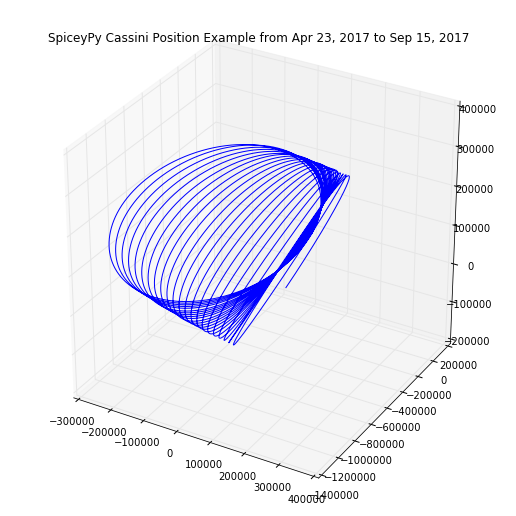

In [7]:
# build a chart
fig = plt.figure(figsize=(9, 9))
ax  = fig.add_subplot(111, projection='3d')
ax.plot(positions.T[0], positions.T[1], positions.T[2])
plt.title('SpiceyPy Cassini Position Example from Apr 23, 2017 to Sep 15, 2017')
plt.show()